<h1>The analysis of a real-world phenomenon for Programming for Data Analysis.<h1>








##  1. Introductory remarks.


A data set shall be interpreted as a collection of statistical data which is usually included in a tabulated form. It is important to mention that most often, the columns correspond to the observed statistical characteristics and each row describes one observation from the sample. The matrix cell values describe the implementation of variable data in subsequent observations.
The Iris flower data set has been available from 1936. It was made by Ronald Fisher, the British genetic and statistician.
The purpose of this project is to research the data set and write documentation and code (in Python programming language) to investigate it. 


## 2.1. Explanation of the use of the Simple random data functions.




It can be devided 4 functions of simple random data:

(a) integers

(b) random 

(c) choice

(d) bytes





(a) integers
***

In general, integers return random integers from low (inclusive) to high (exclusive), or if endpoint=True, low (inclusive) to high (inclusive).
In other words, for example to create an array of random integers in Python 3, with Numpy package, it can be used the random.default_rng() function. 

In the below example return random integers from the “discrete uniform” distribution of the specified dtype. If high is None (the default), then results are from 0 to low.
In the other example the random.default_rng() function, I can specified the range of numbers that I want that the random integers can be selected from and how many integers I want.




In [11]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng()



(array([4., 0., 0., 0., 0., 0., 0., 0., 0., 6.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

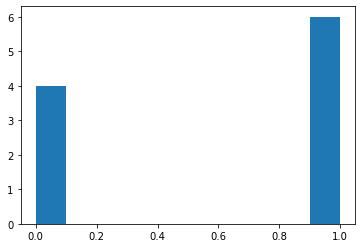

In [48]:
a = rng.integers(2, size=10)
a

plt.hist(a)

It generates a 2 x 4 array of ints between 0 and 4, inclusive:



(array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.]]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 4 Lists of Patches objects>)

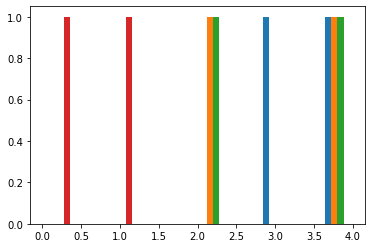

In [49]:
a =rng.integers(5, size=(2, 4)) 
a

plt.hist(a)



It generates a 1 x 3 array with 3 different upper bounds.

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

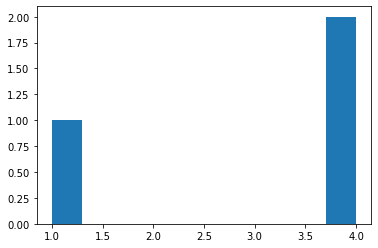

In [50]:
a =rng.integers(1, [3, 5, 10])
a

plt.hist(a)

It generates a a 1 by 3 array with 3 different lower bounds.

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([5. , 5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. ]),
 <a list of 10 Patch objects>)

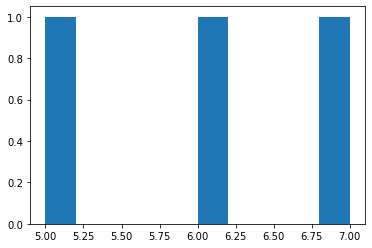

In [51]:
a =rng.integers([1, 5, 7], 10)
a

plt.hist(a)


It generates a 2 by 4 array using broadcasting with dtype of uint8.

(array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.]]),
 array([ 7. ,  7.9,  8.8,  9.7, 10.6, 11.5, 12.4, 13.3, 14.2, 15.1, 16. ]),
 <a list of 4 Lists of Patches objects>)

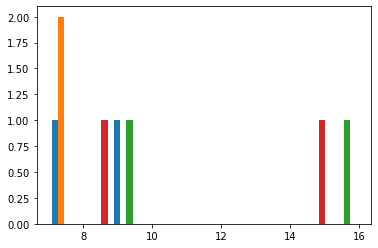

In [16]:
a =rng.integers([1, 3, 5, 7], [[10], [20]], dtype=np.uint8)
a

plt.hist(a)

(array([ 998706.,  999749.,  999429.,  999515., 1001473., 1000032.,
         998578., 1001877.,  999485., 1001156.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

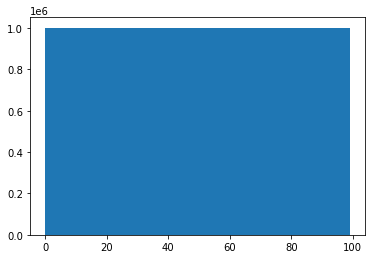

In [52]:
ab = rng.integers(100, size=10000000)
ab

plt.hist(ab)


This is a sample of the uniform distribution. 

(b) random 

****

In general,with random I can make results reproducible.

The example below returns random floats in the half-open interval [0.0, 1.0).

Results are from the “continuous uniform” distribution over the stated interval. To sample Unif[a, b), b > a multiply the output of random by (b-a) and add a:

rng = np.random.default_rng()

rng.random()

In [18]:
type(rng.random())

float

In [53]:
rng.random((5,))





array([0.78077948, 0.69764184, 0.37595492, 0.55806431, 0.01965249])

In prints three-by-two array of random numbers from [-5, 0):





In [54]:
5 * rng.random((3, 2)) - 5


array([[-1.69916012, -3.61491176],
       [-1.78858999, -1.81300278],
       [-3.72599561, -0.8978962 ]])

An example of histogram plot for function`s visualization: 

(array([1002948., 1000310., 1001192.,  998338.,  999461.,  999165.,
         999428., 1000453., 1000374.,  998331.]),
 array([1.12493803e-07, 1.00000095e-01, 2.00000078e-01, 3.00000061e-01,
        4.00000044e-01, 5.00000027e-01, 6.00000010e-01, 6.99999993e-01,
        7.99999976e-01, 8.99999959e-01, 9.99999942e-01]),
 <a list of 10 Patch objects>)

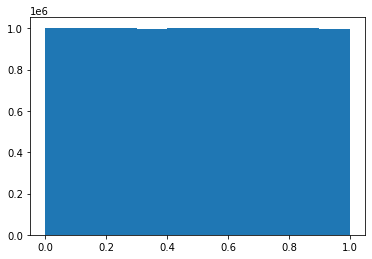

In [55]:
a = rng.random((10000000,))
a

plt.hist(a)



This histogram square represents uniform distribution where every value is the same - bins have same value.

(array([11., 17., 10., 12., 11., 12.,  7.,  4.,  2., 14.]),
 array([8.69066262e-04, 9.97953837e-02, 1.98721701e-01, 2.97648019e-01,
        3.96574336e-01, 4.95500653e-01, 5.94426971e-01, 6.93353288e-01,
        7.92279606e-01, 8.91205923e-01, 9.90132241e-01]),
 <a list of 10 Patch objects>)

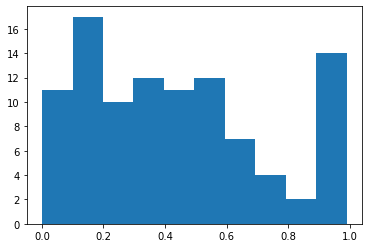

In [56]:
s = rng.random((100),)

plt.hist(s)



This is a histogram of data randomly generated. The data are quite flat. 

(c) choice

*****

The choice helps to produce 1-D or 2-D arrays. 

In this state of affairs, choice generates a random sample from a given 1-D array

Generate a uniform random sample from np.arange(5) of size 3:

In [57]:
import numpy as np
rng = np.random.default_rng()
rng.choice(5, 3)



array([1, 2, 1], dtype=int64)

This is equivalent to rng.integers(0,5,3)

An example of generating a non-uniform random sample from np.arange(5) of size 3:

(array([0., 0., 0., 0., 0., 3., 0., 0., 0., 0.]),
 array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5]),
 <a list of 10 Patch objects>)

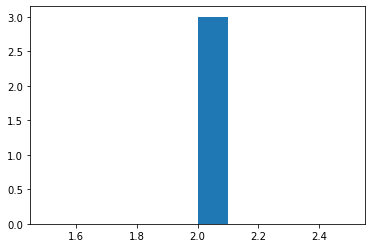

In [58]:
x = rng.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0])
x

plt.hist(x)

An example of generating a uniform random sample from np.arange(5) of size 3 without replacement:

(array([1., 0., 0., 0., 0., 0., 0., 1., 0., 1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

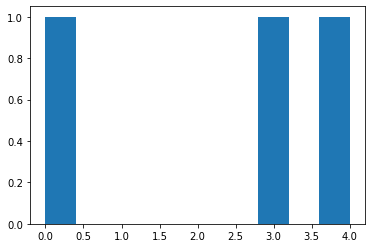

In [59]:
x = rng.choice(5, 3, replace=False)
x

plt.hist(x)
#This is equivalent to rng.permutation(np.arange(5))[:3]

An example of generating a non-uniform random sample from np.arange(5) of size 3 without replacement:

(array([1., 0., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

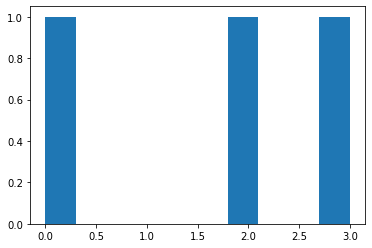

In [26]:
x = rng.choice(5, 3, replace=False, p=[0.1, 0, 0.3, 0.6, 0])
x

plt.hist(x)

An example of repeating any of the above with an arbitrary array-like instead of just integers. 

In [27]:
aa_milne_arr = ['pooh', 'rabbit', 'piglet', 'Christopher']
rng.choice(aa_milne_arr, 5, p=[0.5, 0.1, 0.1, 0.3])

array(['pooh', 'Christopher', 'pooh', 'pooh', 'piglet'], dtype='<U11')

A histogram plot with function`s visualization: 

(array([3015., 2983., 3019., 2976., 3006., 3011., 2923., 2969., 3046.,
        3052.]),
 array([    0. ,  4999.6,  9999.2, 14998.8, 19998.4, 24998. , 29997.6,
        34997.2, 39996.8, 44996.4, 49996. ]),
 <a list of 10 Patch objects>)

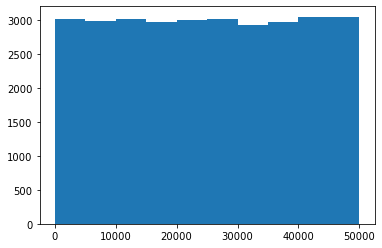

In [28]:
import matplotlib.pyplot as plt
a = rng.choice(50000, 30000, replace=False)
a

plt.hist(a)
# This histogram plot is almost the same in value.

(d) bytes

*****


This will present of a return random bytes. 

In [29]:
np.random.default_rng().bytes(10) 
# An output can be changed, after conducting simple operation.

b'\xc83\x94\xa4\xc8\x86\x14\x81\xad\xd3'

In [30]:
np.random.default_rng().bytes(80)

b'\xc0\xeb\xf6>\xbdX\x93\x1d\xa7\xaa+\xd48\xaeg<\x1a\xde\xd2k\xaa\x8e\x92V!c\xc9LI\xb4\xe7E\xcd\x00j\x00\xd9\x00l-o\xfd(\xe7\xaa1\x00\xe2\x17\xc2\xd91 \xbae\x00\x15B\xc9W\x1d\xe8W\x98\xff\x10\x17\nX\x88B\x95\x8fDJn\x9a\xa5\xae\xfd'

## 2.2. Explanation of the use of the Permutations functions.

It can be devided 2 functions of Permutations:

(a) shuffle

(b) permutation






(a) shuffle
***

Shuffle lets a user tio modify a sequence in-place by shuffling its contents.

The below is an example of order of sub-arrays is changed but their contents remains the same.



(array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000.]),
 array([   0. ,  999.9, 1999.8, 2999.7, 3999.6, 4999.5, 5999.4, 6999.3,
        7999.2, 8999.1, 9999. ]),
 <a list of 10 Patch objects>)

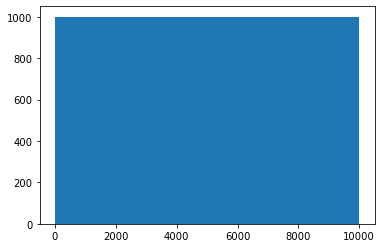

In [31]:
rng = np.random.default_rng()
arr = np.arange(10000)
rng.shuffle(arr)
arr

plt.hist(arr)

Hisograms ilustrates a square shape of the same values. 

(array([[1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 1.]]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 2 Lists of Patches objects>)

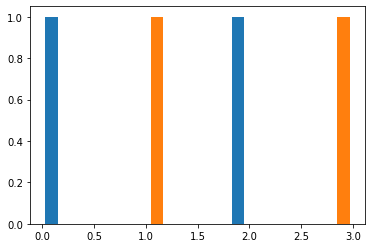

In [32]:
arr = np.arange(4).reshape((2, 2))
rng.shuffle(arr)
arr

plt.hist(arr)

(array([[0., 1., 0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0., 0., 1.],
        [1., 0., 0., 1., 0., 0., 0., 1., 0., 0.]]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 3 Lists of Patches objects>)

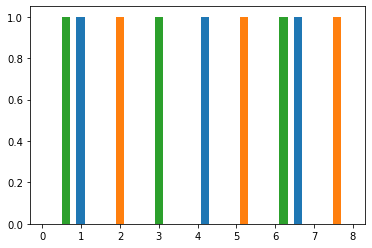

In [33]:
arr = np.arange(9).reshape((3, 3))
rng.shuffle(arr, axis=1)
arr

plt.hist(arr)

(b) permutation
***
Permutation randomly permutes a sequence, or return a permuted range.



In [34]:
rng = np.random.default_rng()
rng.permutation(8)

array([0, 6, 2, 5, 7, 4, 3, 1])

In [35]:
rng = np.random.default_rng()
rng.permutation(1000)

array([680, 710, 954, 655, 839, 877, 637, 754,  56, 597, 119, 225, 547,
       152, 342, 291, 943, 520, 256, 926, 989, 218, 812, 608,  91, 143,
       481, 698, 349,  94, 939, 795, 919, 469, 126, 949, 125, 740, 137,
        12, 670, 360, 244, 574, 817,  43, 231, 925, 770, 640, 484,  23,
       623, 564, 533, 865, 644, 222, 370, 854, 378, 228, 423, 825, 324,
         1, 767, 245, 462, 855, 471, 112, 526, 868, 808, 508, 546, 496,
       963, 534, 492, 252, 412, 708, 843, 650, 757, 357, 239,  54, 555,
       635,  65, 906, 103, 772, 297, 920,  95, 789, 472, 187, 775,  92,
       598, 699, 340, 305, 157, 579, 549, 121,  67, 427, 439, 454, 334,
       229, 479, 799, 624,  19, 944, 347,  99, 189, 869,  88, 822,  55,
       198, 658, 182,  45, 150, 381, 283, 889, 883, 326, 475, 782, 832,
       827, 277, 755, 838, 968, 872,  46, 625, 379, 638, 791, 402, 589,
       314, 265, 656, 723, 486, 936, 421, 517, 501,   9, 880, 721, 821,
       458, 350, 316, 945, 200, 970, 108, 141, 972, 286, 853,  3

(array([1., 0., 1., 0., 0., 1., 0., 1., 0., 1.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <a list of 10 Patch objects>)

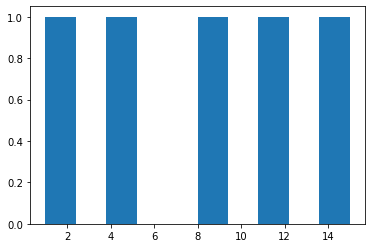

In [36]:
x = rng.permutation([1, 4, 9, 12, 15])
x

plt.hist(x)

In [37]:
arr = np.arange(9).reshape((3, 3))
rng.permutation(arr)

array([[0, 1, 2],
       [6, 7, 8],
       [3, 4, 5]])

In [38]:
arr = np.arange(9).reshape((3, 3))
rng.permutation(arr)

array([[0, 1, 2],
       [6, 7, 8],
       [3, 4, 5]])

(array([[1., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0., 0., 1.]]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 3 Lists of Patches objects>)

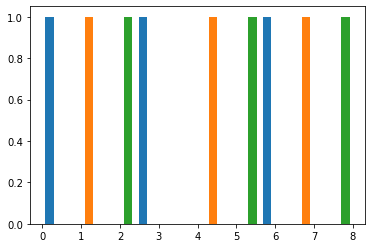

In [39]:
arr = np.arange(9).reshape((3, 3))
rng.permutation(arr)
arr

plt.hist(arr)

In [40]:
rng.permutation("abc")

AxisError: axis 0 is out of bounds for array of dimension 0

In [99]:
arr = np.arange(9).reshape((3, 3))
rng.permutation(arr, axis=1)

array([[1, 0, 2],
       [4, 3, 5],
       [7, 6, 8]])

In [85]:
arr = np.arange(9).reshape((3, 3))
rng.permutation(arr, axis=0)

array([[0, 1, 2],
       [6, 7, 8],
       [3, 4, 5]])

(array([[1., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0., 0., 1.]]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 3 Lists of Patches objects>)

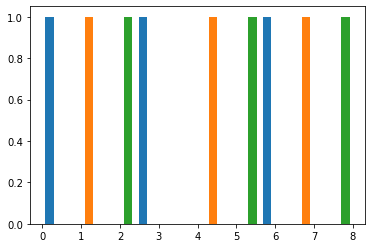

In [86]:
arr = np.arange(9).reshape((3, 3))
rng.permutation(arr, axis=1)
arr
plt.hist(arr)

## 3. The use and purpose of five Distributions functions.
***

The below 5 Distributions functions has been taken into analysis: 

(a)gamma

(b)geometric

(c)logistic

(d)triangular

(e)uniform





(a)gamma
***
Gamma draws samples from a Gamma distribution.
Samples are drawn from a Gamma distribution with specified parameters, shape (sometimes designated “k”) and scale (sometimes designated “theta”), where both parameters are > 0.


(array([60., 57., 35., 22.,  8., 11.,  5.,  1.,  0.,  1.]),
 array([ 0.32560841,  2.2195934 ,  4.11357838,  6.00756337,  7.90154835,
         9.79553334, 11.68951833, 13.58350331, 15.4774883 , 17.37147329,
        19.26545827]),
 <a list of 10 Patch objects>)

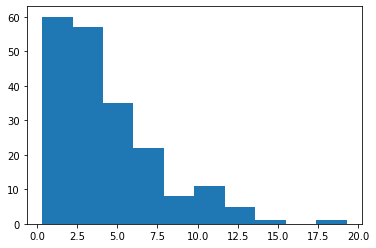

In [101]:
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.default_rng().gamma(shape, scale, 200)
s
plt.hist(s)

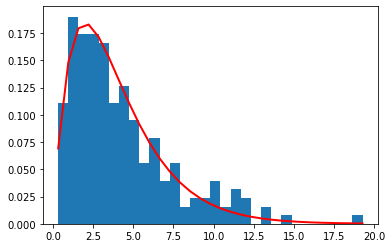

In [103]:
#Display the histogram of the sample, along with the probability density function:

import matplotlib.pyplot as plt
import scipy.special as sps  
count, bins, ignored = plt.hist(s, 30, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()

(b) geometric
***

Geometric draws samples from the geometric distribution.

(array([1.4564e+04, 3.1560e+03, 1.2920e+03, 7.0500e+02, 1.6000e+02,
        6.2000e+01, 5.2000e+01, 4.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <a list of 10 Patch objects>)

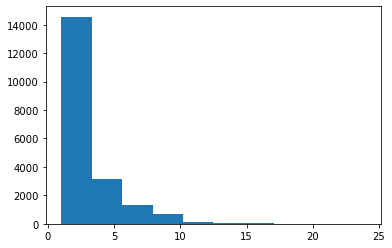

In [104]:
z = np.random.default_rng().geometric(p=0.35, size=20000)
z
plt.hist(z)

How many trials succeeded after a single run? To answer that question: 

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.1553, -0.0553,  0.0447,  0.1447,  0.2447,  0.3447,  0.4447,
         0.5447,  0.6447,  0.7447,  0.8447]),
 <a list of 10 Patch objects>)

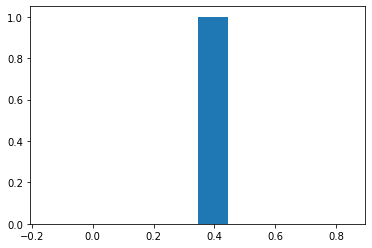

In [98]:
x =(z == 1).sum() / 10000.
x
plt.hist(x)

(c) logistic
***

Logistic draws samples from the distribution. 

Samples are drawn from a logistic distribution with specified parameters, loc (location or mean, also median), and scale (>0).

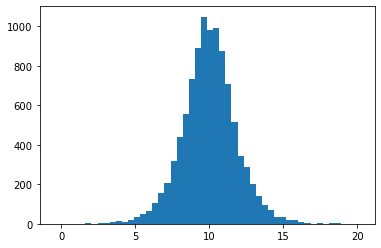

In [105]:
loc, scale = 10, 1
s = np.random.default_rng().logistic(loc, scale, 10000)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, bins=50)

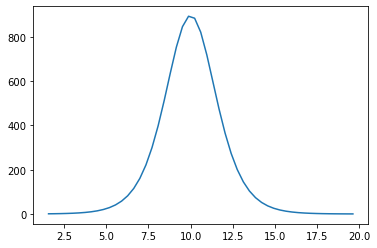

In [103]:
# plot against distribution

def logist(x, loc, scale):
    return np.exp((loc-x)/scale)/(scale*(1+np.exp((loc-x)/scale))**2)
lgst_val = logist(bins, loc, scale)
plt.plot(bins, lgst_val * count.max() / lgst_val.max())
plt.show()

(d) triangular
***

Triangular draws samples from the triangular distribution over the interval [left, right].

The triangular distribution is a continuous probability distribution with lower limit left, peak at mode, and upper limit right. Unlike the other distributions, these parameters directly define the shape of the pdf.



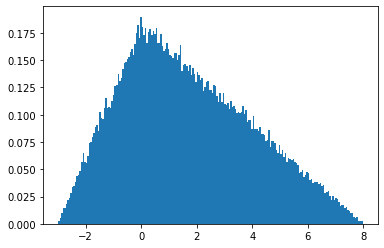

In [120]:
import matplotlib.pyplot as plt
h = plt.hist(np.random.default_rng().triangular(-3, 0, 8, 100000), bins=200,
             density=True)
plt.show()

(e) uniform
***

Uniform draws samples from a uniform distribution.

Samples are uniformly distributed over the half-open interval [low, high) (includes low, but excludes high). In other words, any value within the given interval is equally likely to be drawn by uniform.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

s = np.random.default_rng().uniform(-1,0,1000)
s

array([-2.10310523e-01, -3.85695301e-01, -2.50959453e-01, -1.10852757e-01,
       -1.85286616e-01, -3.00326340e-01, -2.49583618e-01, -1.66180193e-01,
       -2.49012930e-01, -1.85548038e-01, -9.91648444e-01, -4.27101725e-01,
       -9.46662282e-01, -9.09442366e-01, -8.03920654e-01, -5.64477134e-01,
       -2.45348535e-01, -2.26118520e-01, -1.58338150e-01, -7.81065328e-01,
       -8.78745493e-01, -7.42938414e-01, -1.31060944e-01, -1.34318748e-01,
       -7.60207778e-01, -4.49512431e-01, -2.86022722e-01, -1.17155690e-01,
       -7.67463375e-01, -3.84491765e-01, -7.25911162e-01, -8.24006551e-01,
       -8.71051781e-02, -7.72680818e-01, -5.25994226e-01, -1.36136757e-01,
       -1.15419589e-01, -6.18184257e-01, -9.31292939e-01, -2.38335678e-01,
       -9.09946906e-01, -5.50209334e-01, -3.40495794e-01, -9.75797857e-01,
       -3.68021391e-01, -7.19526874e-01, -7.39353593e-02, -5.09037080e-01,
       -2.47177990e-01, -3.60980795e-01, -6.30387889e-01, -4.77107065e-01,
       -2.06888536e-01, -

In [10]:
np.all(s >= -1)

NameError: name 'np' is not defined

In [117]:
np.all(s < 0)

False

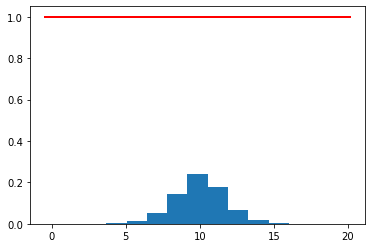

In [119]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

This displays the histogram of the samples, along with the probability density function.

## 4. The use of seeds in generating pseudorandom numbers.
***



Seeds are the parts of the Random generator. A seed is associated with a time of a computer when the code is run. 

<i>Call default_rng to get a new instance of a Generator, then call its methods to obtain samples from different distributions. By default, Generator uses bits provided by PCG64 which has better statistical properties than the legacy MT19937 used in RandomState.</i>

(array([2., 2., 3., 2., 0., 0., 3., 0., 0., 3.]),
 array([-1.70167671, -1.35476181, -1.00784691, -0.66093202, -0.31401712,
         0.03289778,  0.37981268,  0.72672758,  1.07364248,  1.42055738,
         1.76747228]),
 <a list of 10 Patch objects>)

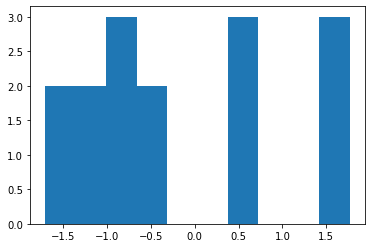

In [44]:

from numpy.random import default_rng
rng = default_rng()
vals = rng.standard_normal(15)
more_vals = rng.standard_normal(10)
vals

plt.hist(vals)


(array([1., 2., 0., 1., 2., 2., 1., 2., 2., 2.]),
 array([-1.51893415, -1.27713786, -1.03534158, -0.79354529, -0.55174901,
        -0.30995272, -0.06815644,  0.17363985,  0.41543614,  0.65723242,
         0.89902871]),
 <a list of 10 Patch objects>)

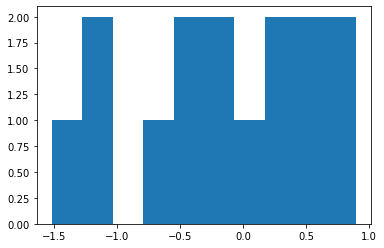

In [45]:
# instead of this
from numpy import random
vals = random.standard_normal(10)
more_vals = random.standard_normal(10)
vals

plt.hist(vals)

## 5. Legacy of the Random Generation Mersenne Twister (MT19937) to Permuted Congruential Generator (64-bit, PCG64).
***

<i> The RandomState provides access to legacy generators. This generator is considered frozen and will have no further improvements. It is guaranteed to produce the same values as the final point release of NumPy v1.16. These all depend on Box-Muller normals or inverse CDF exponentials or gammas. This class should only be used if it is essential to have randoms that are identical to what would have been produced by previous versions of NumPy.
RandomState adds additional information to the state which is required when using Box-Muller normals since these are produced in pairs. It is important to use RandomState.get_state, and not the underlying bit generators state, when accessing the state so that these extra values are saved.
Although we provide the MT19937 BitGenerator for use independent of RandomState, note that its default seeding uses SeedSequence rather than the legacy seeding algorithm. RandomState will use the legacy seeding algorithm. The methods to use the legacy seeding algorithm are currently private as the main reason to use them is just to implement RandomState. However, one can reset the state of MT19937 using the state of the RandomState:</i>

In [68]:
from numpy.random import Generator, PCG64
rg = Generator(PCG64(12345))
rg.standard_normal()
rg


Generator(PCG64) at 0x2349F2A37C0

In [66]:
from numpy.random import MT19937
from numpy.random import RandomState

rs = RandomState(12345)
mt19937 = MT19937()
mt19937.state = rs.get_state()
rs2 = RandomState(mt19937)

# Same output
rs.standard_normal()
rs2.standard_normal()

rs.random()
rs2.random()

rs.standard_exponential()
rs2.standard_exponential()

0.22886020849774785

In [69]:
from numpy.random import Generator, PCG64, SeedSequence
sg = SeedSequence(1234)
rg = [Generator(PCG64(s)) for s in sg.spawn(10)]

The above code represents preferred way to use a BitGenerator in parallel applications is to use the SeedSequence.spawn method to obtain entropy values, and to use these to generate new BitGenerators. PCG64 makes a guarantee that a fixed seed and will always produce the same random integer stream. 

## List of sources.

***

<b> 1) DOCUMENTS AND REPORTS.</b>

Datasets: 
<http://www.cs.toronto.edu/~delve/data/>

UCI Machine Learning Repository:
<http://archive.ics.uci.edu/ml/datasets/Iris>

NumPy Documentation:
<https://numpy.org/doc/stable/reference/random/>

NumPy v1.19 Manual:
<https://numpy.org/doc/stable/index.html>

NumPy in general:
<https://numpy.org/>


<b> 2) ARTICLES, MONOGRAPHS, STUDIES.</b>

Encyclopaedia Britannica: 
<http://www.britannica.com/>

Schweppes J., How to Think Write and Cite – key skills for Irish Law, Dublin 2011.

Waugh S., Extending and benchmarking Cascade-Correlation, Tasmania 1995.

Internet Resources: 

<https://www.w3schools.com/python/numpy_random.asp>

<https://www.geeksforgeeks.org/numpy-random-rand-python/>

<https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html>

<https://www.markdownguide.org/getting-started/>

<https://medium.com/@ingeh/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed>

<https://github.com/>

<https://en.wikipedia.org/wiki/Triangular_distribution>

<https://gitter.im/GMIT-Python-Learners-2019/community>

<https://docs.python.org/3/tutorial/>

<https://leanpub.com/pyprog/read>

<https://www.codecademy.com/courses/data-visualization-python/lessons/matplotlib-i/exercises/introduction-matplotlib-i>



